













#**Poetry in Motion: Leveraging Pre-Snap Movement to Maximize Separation and Scheming Efficiency**
Metric Track | Authors: [Rohit Bhagavatula](https://www.linkedin.com/in/rohitbhagavatula/) and [Ryan Schwartz](https://www.linkedin.com/in/ryan-schwartz619)


#Introduction

*“We pre-snap motion to gain advantages for ourselves, but you have to be super detailed to be able to do that at a high rate, with snap counts, motion landmarks, and it takes 100 percent commitment from all those guys to be able to get that done”* - Mike McDaniel


---



Pre-snap motion has become a staple of modern NFL offenses, offering advantages like identifying defensive schemes, exploiting matchups, and creating space in coverage. Motion often sets up the motion player (or "motioner") as a target or distracts defenders to benefit other route runners.

The growing reliance on motion and the lack of standardized labels prompted us to develop new metrics and definitions to better analyze its impact of pre-snap information on offensive value.


#I. Metric Creation


---



####**Motion Clustering**

In order to gather further insights into this relationship, we first needed to differentiate the different types of motion algorithmically. We chose to use <a href="https://en.wikipedia.org/wiki/K-means_clusteringclustering">k-means clustering</a>  to quantitatively separate motion types based on the following features:

* **First/Last Horizontal Position**
* **First/Last Vertical Position**
* **Greatest/Least Horizontal Position**
* **Greatest/Least Vertical Position**
* **Direction Change**
* **In Motion at Ball Snap**
* **Total Distance**
* **Position (RB, TE, or WR)**


We then defined seven separate “clusters” or types of motion below, each with distinct characteristics that could be used to find relationships with our other metrics.








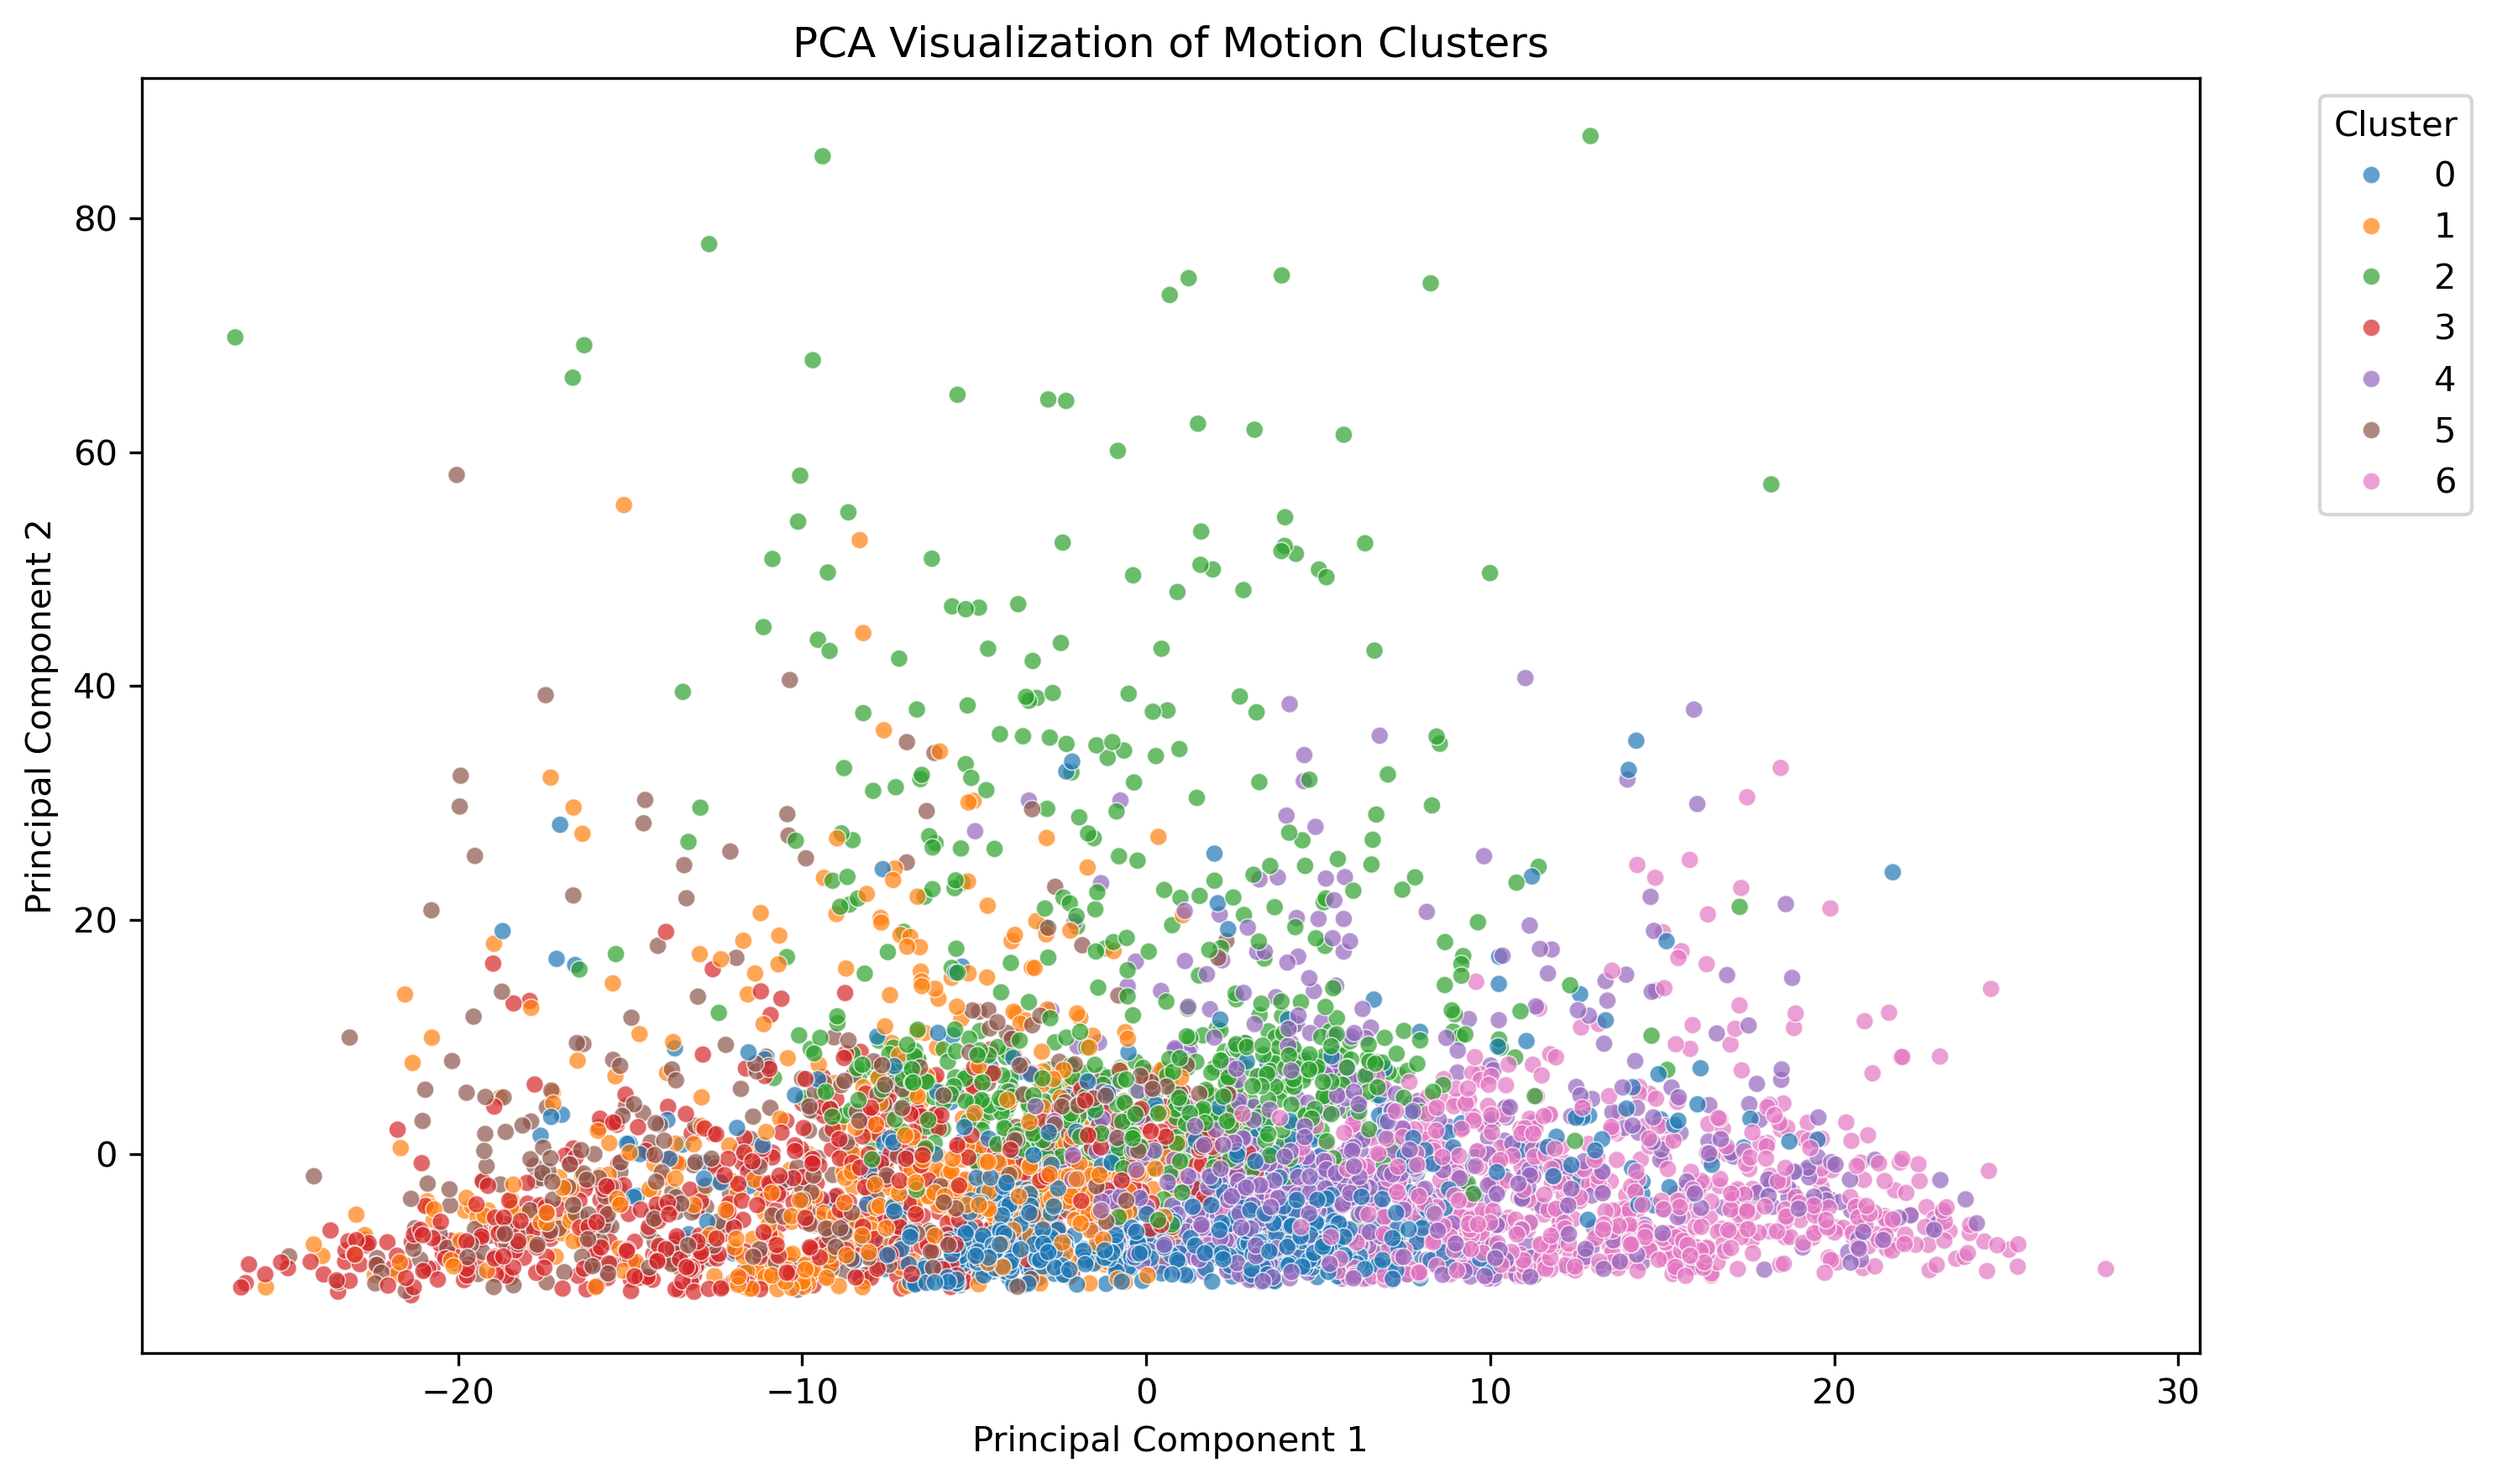

The graph above is a visual representation of the clusters based on a <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Principal Components Analysis</a>  of the summation of all the included features. Each of the individual clusters represents a specifc cluster and their grouping provides strong evidence in the similarity of the given points. The clusters themselves, as seen below, are centroids in which *n* obersevations are partioned to minimize within-cluster variances:

$$
J = \sum_{i=1}^{k} \sum_{j=1}^{n_i} | x_j^{(i)} - \mu_i |^2
$$


We decided to partition the observations into **7 distinct clusters**, each characterized by its own unique defining features:




&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;**Cluster 0**&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Cluster 1**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Cluster 2**

![clusters1](https://i.imgur.com/fyaFQUT.gif)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Cluster 3**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;**Cluster 4**

![clusters](https://i.imgur.com/l0F3h1W.gif)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Cluster 5**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;**Cluster 6**

![clusters2](https://i.imgur.com/fmuOOgI.gif)

* **Cluster 0**: Running backs motioning around the quarterback.
* **Cluster 1**: Tight ends moving horizontally across the line.
* **Cluster 2**: Running backs and wide receivers covering long distances, mostly at the snap.
* **Cluster 3**: Wide receivers covering short distances, always moving at the snap.
* **Cluster 4**: Tight ends moving opposite to Cluster 1, often for chip blocking.
* **Cluster 5**: Mix of wide receivers and running backs, with some motion at the snap.
* **Cluster 6**: Wide receivers motioning toward and then back from the quarterback, with snap movement.

####**Voronoi Separation**

In most current NFL receiver separation stats, separation is measured as the distance, in yards, between the receiver and the nearest defender at the time of the completion/incompletion. We felt that this approach didn't account for two important things:
  1. The positioning of all nearby defenders, relative to the receiver
  2. The area on the field where the receiver can make a catch, but defender cannot

To account for both of these factors, we measured separation as the amount of field that the receiver owns, using voronoi diagrams. <a href="https://en.wikipedia.org/wiki/Voronoi_diagram">Voronoi</a> diagrams partition a plane by creating a polygon around each point. The Voronoi cell $𝑉(𝑃_{𝑖})$ for a point $𝑃_{𝑖}$ is defined as:




$$V(P_{i}) = \{x∈𝑅^2: d(𝑥,P_{i})≤𝑑(𝑥,P_{j}) ∀_{j} ≠𝑖 \}$$


where $𝑑(𝑥,𝑃_{k}) $ is the Euclidean distance from $ 𝑥 to 𝑃_{𝑘}. $

The area of one partition is calculated with the "**Shoelace Formula**":

$$ A = \frac{1}{2} | \sum_{k=1}^{n} (x_{k}y_{k+1} - y_{k}x_{k+1}) | $$

where $ (x_{k}, y_{k}) $ are the coordinates of the vertices of the polygon and $ (x_{n+1}, y_{n+1}) = (x_{1}, y_{1}) $
closes the polygon.

This allows us to quantify the square yards that each player on the field owns, telling us the seperation radius each receiver has created. To prevent receivers from being unfairly rewarded for space behind them, we added a dummy player 5 yards behind each receiver in every frame.

We took inspiration for this concept from a submission to the NFL Big Data Bowl in a previous year that can be found  <a href=" https://www.kaggle.com/code/matthewpchang/uncovering-missed-tackle-opportunities/">here</a>.


Here is what the final diagram looks like for a sample frame:

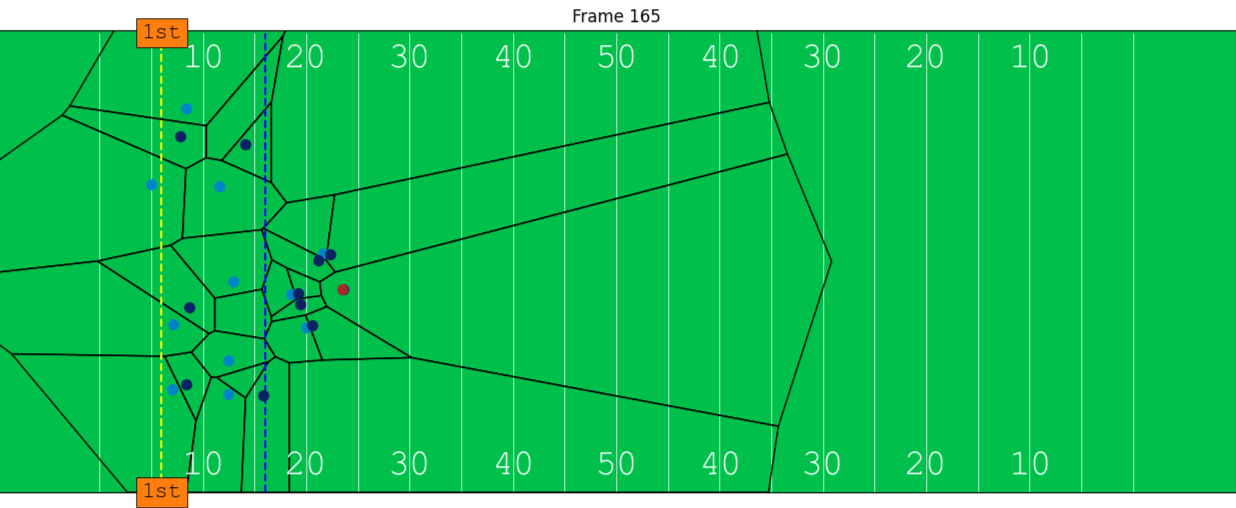

One challenge we immediately identified with this approach is that running backs in the backfield often had disproportionately large Voronoi areas due to their position behind the line of scrimmage, where defenders were typically farther away. To address this, we sought to transform raw Voronoi area into a more meaningful value of separation metric.

"To calculate our **Value of Separation** (VoS) metric, we performed a simple linear regression on yards downfield versus Expected Points Added (EPA) for every play in the dataset. This regression provided the formula for determining **VoS**:




$$valueOfSeparation=voronoiArea*(1.01750249^{yardsDownField})$$




#II. Modelling


---



####**Model Building**

We compiled a dataset of **2,800 passing plays with motion**, excluding turnovers, sacks, and tipped balls to focus on targeted receivers. Using a function, we condensed player-level tracking data into one row per play. Each row includes pre-snap details for all route runners, such as the motion cluster, route run, and the route runner with maximum separation.

We selected thirteen features as model inputs:

* **Down**
* **Yards to Go**
* **Offensive Formation**
* **Defensive Coverage**
* **Absolute Yardline Number**
* **Route Runner Position (First Y, Second Y…)**
* **Route (First Route, Second Route…)**
* **Safety Position**
* **Running Back Position**
* **aboveLine**
* **belowLine**
* **Motion Receiver**
* **Motion Cluster**






After training and testing both a Random Forest model and an XGBoost model, we decided to use our Random Forest model because of slightly better performance with the following hyperparamaters:
* **max_depth** = 20
* **max_features** = 'log2'
* **n_estimators** = 200

####**Model Performance**

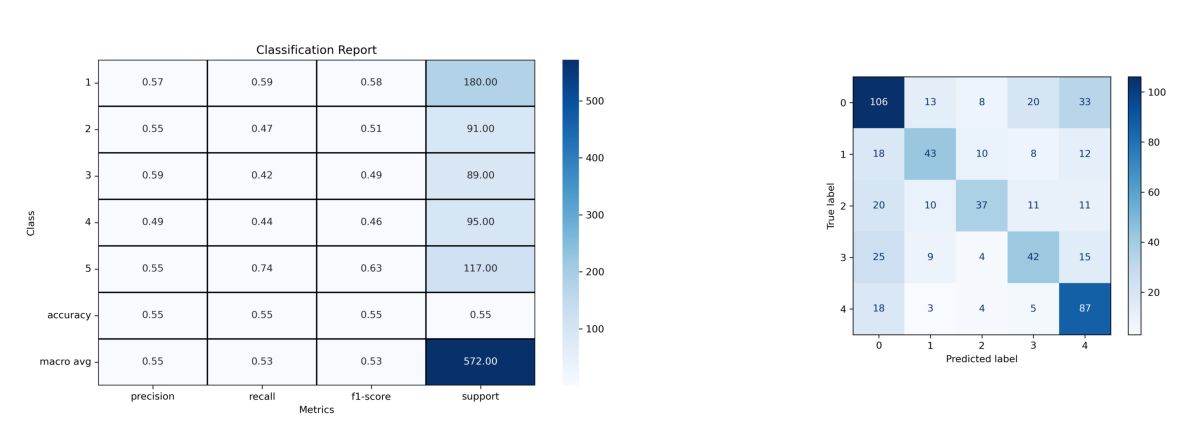

In [ ]:
#@title Classification Report and Confusion Matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,10))

gs = plt.GridSpec(1, 2, width_ratios=[2, 1])

plt.subplot(gs[0])
img1 = mpimg.imread("/content/classification_report.png")
plt.imshow(img1)
plt.axis('off')

plt.subplot(gs[1])
img2 = mpimg.imread("/content/confusion_matrix.png")
plt.imshow(img2)
plt.axis('off')

plt.show()



Our model's lower-than-expected accuracy stemmed from predicting the quarterback's target based solely on the route runner with the greatest **VoS**. Analysis revealed that small differences in separation scores often led to incorrect predictions.

To address this, we adjusted the model to count predictions as correct if a second route runner's separation was within **10 units** of the highest score, accounting for minor human error. This adjustment improved accuracy from **55.6% to 58.7%**, enhancing predictions and better reflecting the human element of football decision-making.

# III. Showing Model Success


---



####**Model and Player Success**

 *The graph on the left represent each route runner's value of seperation over the duration of the play, where the blue dotted line represents the ball snap and the green dotted line representing the ball's release*

We have selected two plays where our model accurately predicts which receiver will achieve the greatest **VoS**. In this first play, the receiver in motion, **Isaiah McKenzie**, is predicted to create the most **VoS**, successfully does so, and becomes the quarterback’s target. This play demonstrates how defenses could use the model to identify the motioning receiver as the quarterback’s primary read.

![first_gif](https://i.imgur.com/PrVTOyo.gif)

This play illustrates a scenario where receivers are in motion, but **Donovan Peoples-Jones** (bottom of screen) is anticipated to achieve the most **VoS**, ultimately does so, and becomes the quarterback's target. It highlights a situation where defenses could leverage the model to recognize that the motioning receiver is being utilized as a decoy.

![second_gif](https://i.imgur.com/VSepg1G.gif)

####**Model or Player Error**

![third_gif](https://i.imgur.com/dOxFF21.gif)




In the example above, the model predicts that the quarterback will target **Malcolm Brown** (at the bottom of the screen), who is expected to achieve the greatest **VoS**. However, Matt Stafford ultimately targets **Tyler Higbee** (at the top of the screen), who has a slightly lower **VoS**. In this case, we consider the throw a correct read by the quarterback, taking into account the speed of play as well as established read patterns or variations in individual player skill.

# IV. Analysis


---



####**Motion Types vs. Defensive Coverages**

Offenses strategically use different types of motion to either target specific players or act as decoys, depending on the defensive coverage. The chart below highlights how often a player in motion achieves the highest **VoS**, categorized by motion cluster and defensive coverage.

For instance, a motion receiver in **Cluster 0** against a **2-Man** defense was expected to achieve the highest separation on their route just **10%** of the time. This analysis provides valuable insight for offenses to optimize play selection in various scenarios and helps defenses recognize and counter offensive tendencies.

<center><img src='https://imgur.com/ohuorn9.png' width='600'></center>

A few findings to note from this table:
* **All motion clusters** are strong against **Cover-0**.
  * This also applied to **Cover-1**, **Cover-2**, **Cover-3**, and  **Quarters** to a lesser extent.
* Only **Clusters 0, 5, and 6** were ever targeted against **Cover-1 Double**, but those motion clusters are very often targeted.
* Only **Clusters 0 and 3** have relatively high target percentages agsint **Cover-6 left**.
* **Clusters 0 and 1** are essentially never targeted in the red zone, but **Clusters 2, 4, 5, 6** have high target percentages.


####**Best Receivers in Motion**

The tables below highlight the efficiency of receivers in motion at getting open when schemed to be the primary target (minimum of 3 attempts). The overall rating is an efficiency metric based on the frequency of outcomes categorized as "**Not Open**," "**Moderately Open**," "**Open**," and "**Wide Open**." The first table showcases the **top 15 receivers** with a rating of *1.0 or higher*, while the second table lists the **10 receivers** with the lowest ratings, all *0.0 or below*.

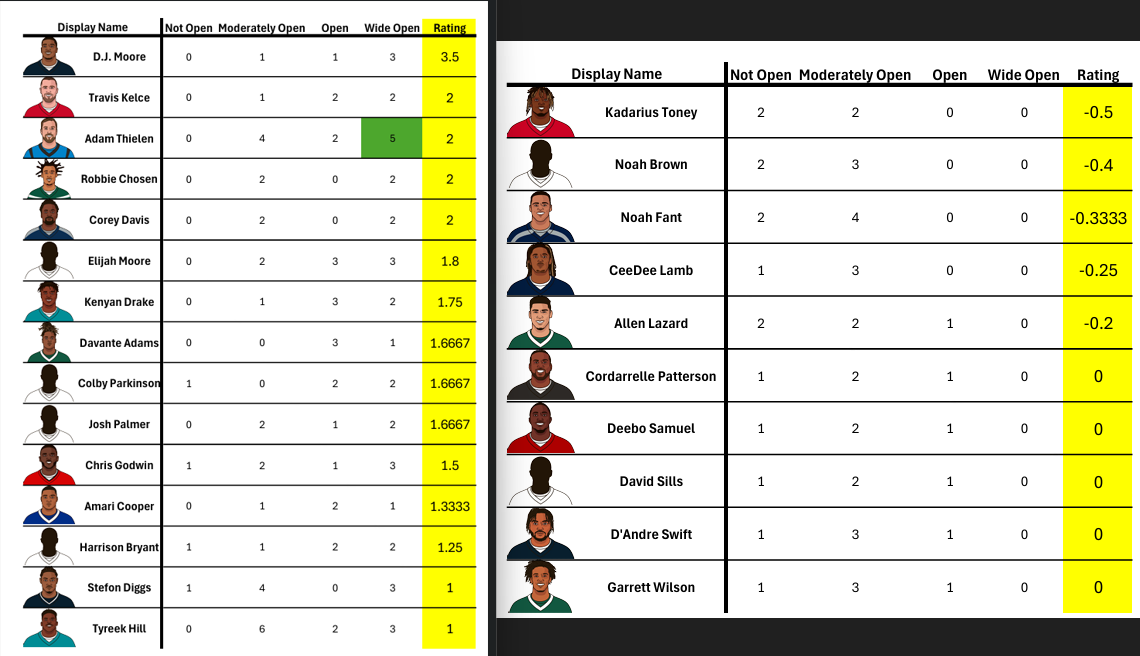

####**Team Level Motion Utilization**

These two tables provide insights into team tendencies regarding motion usage, highlighting which teams primarily use motion as a decoy and which teams target their motion receiver. They are organized by motion cluster, with an overall average included for comparison.

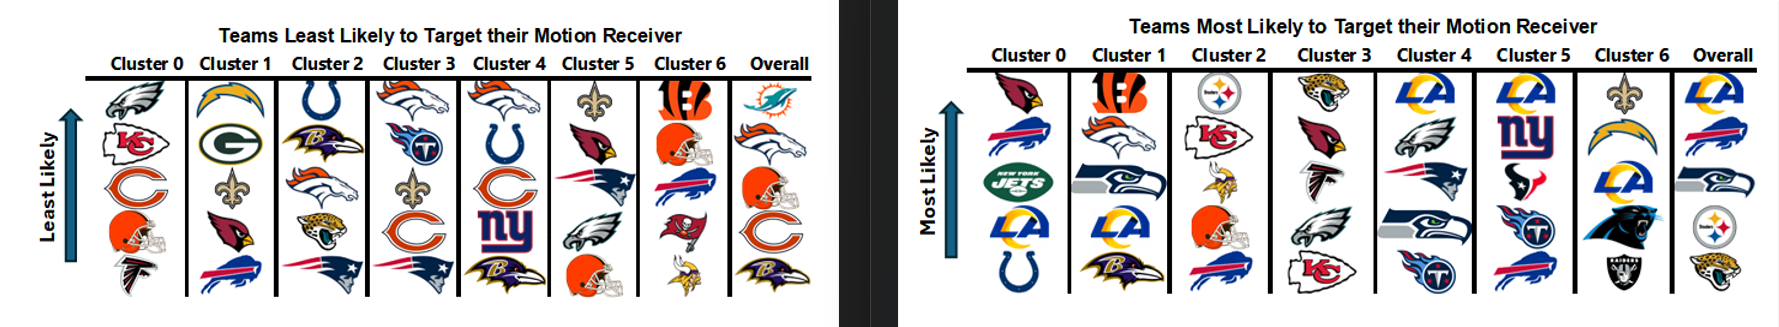

This table highlights teams that appear in both the "**most likely**" and "**least likely**" categories across motion clusters. For instance, **the Ravens, Browns, and Broncos** are among the **least likely teams to target their motion receiver** overall but rank in the **top five for target percentage** within a specific motion cluster. Conversely, **the Bills and Jaguars** are among the **most likely teams to target their motion receiver**, yet **rank in the bottom five for target percentage** in some clusters. These patterns help defenses anticipate teams' use of motion as decoys or primary targets.


These tables analyze how teams target motion receivers. The first highlights the **10 teams most likely to target motion receivers**, even when other receivers are expected to achieve greater **VoS**—indicating they may force the ball. The second shows the **10 teams least likely to target motion receivers**, even when they are expected to create the most separation.

<center><img src='https://imgur.com/3qQTnQT.png' width='500'></center>

The most notable insight from these two tables is the appearance of teams on both lists. **The Pittsburgh Steelers** and the **New York Giants** stand out for simultaneously forcing targets to motion receivers when other receivers are expected to create a greate **VoS**, and underutilizing their motion receivers when they are predicted to be the most open. This highlights a missed opportunity in effectively scheming to maximize the advantage of players in motion.

# V. Conclusion


---



The classification of motion types and the introduction of a new metric to evaluate the **VoS** offer valuable insights into how offenses can leverage pre-snap concepts to counter defensive strategies more effectively. The growing use of motion by offenses highlights this strategic shift, prompting defenses to continually innovate in response.

####**Future Research and Additional Information**

There are several exciting opportunities for future analysis that could build upon this project. If we had access to more player-specific data, we could explore the unique strengths of individual receivers and their relationships with the quarterback. For example, by incorporating a "**catch probability metric**" we could account for scenarios where a receiver with lower separation might still be a better option to target based on their individual skill.

Additionally, analyzing the time to throw could provide valuable insights. This would help defenses identify the quarterback’s progression from the first read to subsequent reads. Lastly, with more detailed clustering data, we could refine our clusters to uncover deeper insights into how player movement creates advantages in finding space within defensive coverages.

---

Word Count: 1968

All of the code for this project can be found here: Github Repo
